In [1]:
import numpy as np
import pandas as pd
import random
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('phase_sheet.xlsx')
data = df.to_numpy()
X = data[:,list(range(25))]
Y = data[:,25]
# Y = np.expand_dims(y, axis=1)
Y = Y - 1
Y = Y.astype(int)
X = X.astype(int)

print(f'The shape of input X is {X.shape}')
print(f'The shape of output Y is {Y.shape}')


The shape of input X is (383, 25)
The shape of output Y is (383,)


In [3]:
X_train = X
Y_train = Y
X_temp, X_, Y_temp, Y_= train_test_split(X, Y, test_size=0.30, random_state=23)
X_cv,X_test,Y_cv,Y_test = train_test_split(X_, Y_, test_size=0.50, random_state=23)
print(f'The shape of training set(input) is: {X_train.shape}')
print(f'The shape of training set(output) is: {Y_train.shape}')
print(f'The shape of CV set(input) is: {X_cv.shape}')
print(f'The shape of CV set(output) is: {Y_cv.shape}')
print(f'The shape of test set(input) is: {X_test.shape}')
print(f'The shape of test set(output) is: {Y_test.shape}')

The shape of training set(input) is: (383, 25)
The shape of training set(output) is: (383,)
The shape of CV set(input) is: (57, 25)
The shape of CV set(output) is: (57,)
The shape of test set(input) is: (58, 25)
The shape of test set(output) is: (58,)


In [4]:
# model = XGBClassifier(objective='multi:softmax',learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8, random_state=42)
best_model = None
train_accuracy = float(0)
best_max_depth = None
best_n_estimator = None
depth_range = [2,4,6,8,10]
n_estimators_range = [100,200,300]
for depth in depth_range:
    for n_estimator in n_estimators_range:
        model = XGBClassifier(objective='multi:softmax',learning_rate=0.1, max_depth=depth, n_estimators=n_estimator, subsample=0.9, random_state=1)
        model.fit(X_train, Y_train)
        Y_train_hat = model.predict(X_train)
        accuracy = accuracy_score(Y_train,Y_train_hat)
        if accuracy > train_accuracy:
            train_accuracy = accuracy
            best_model = model
            best_max_depth = depth
            best_n_estimator = n_estimator

print(f'Max Depth: {best_max_depth}')
print(f'n_estimmators: {best_n_estimator}')

Y_train_hat = best_model.predict(X_train)
train_accuracy = accuracy_score(Y_train,Y_train_hat)
print(f'Training Accuracy: {train_accuracy}')

Y_cv_hat = best_model.predict(X_cv)
val_accuracy = accuracy_score(Y_cv,Y_cv_hat)
print(f'Validation Accuracy: {val_accuracy}')

Y_test_hat = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test,Y_test_hat)
print(f'Testing Accuracy: {test_accuracy}')


Max Depth: 4
n_estimmators: 200
Training Accuracy: 0.95822454308094
Validation Accuracy: 0.9473684210526315
Testing Accuracy: 0.9482758620689655


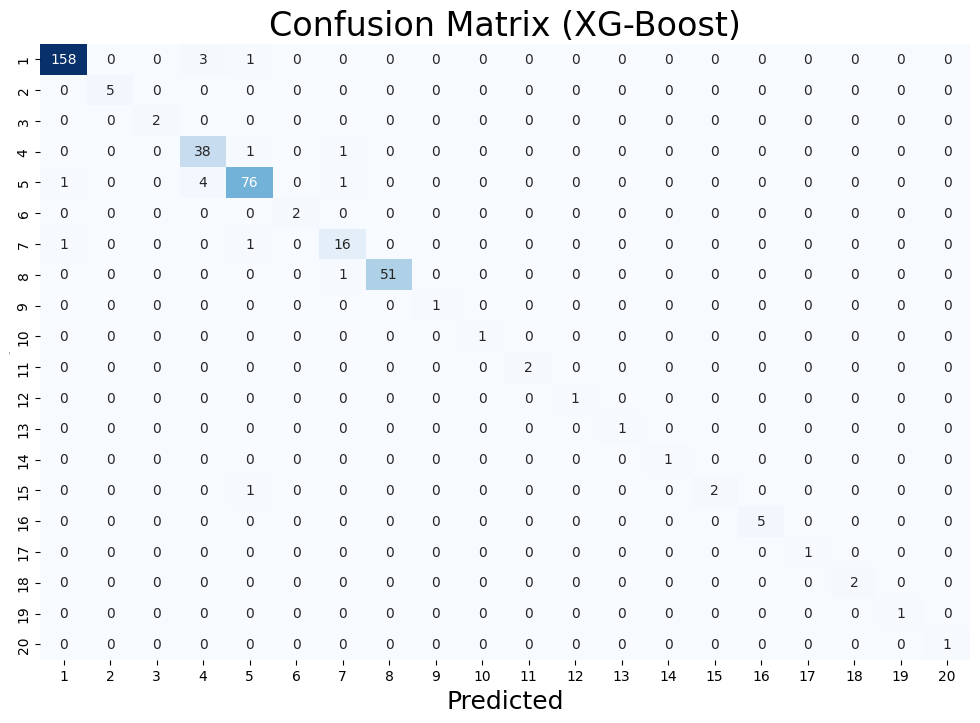

In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming your predictions are stored in 'y_pred'
conf_matrix = confusion_matrix(Y_train, Y_train_hat)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Adding 1 to class labels for display purposes
class_labels = [str(i) for i in range(1, 21)]
plt.xticks(ticks=[i + 0.5 for i in range(20)], labels=class_labels)
plt.yticks(ticks=[i + 0.5 for i in range(20)], labels=class_labels)

plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=1)
plt.title('Confusion Matrix (XG-Boost)', fontsize=24)
plt.savefig('xgb/cf.png')
plt.show()

In [6]:
from sklearn.metrics import classification_report

print(classification_report(Y_train, Y_train_hat))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       162
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2
           3       0.84      0.95      0.89        40
           4       0.95      0.93      0.94        82
           5       1.00      1.00      1.00         2
           6       0.84      0.89      0.86        18
           7       1.00      0.98      0.99        52
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         1
          17       1.00    

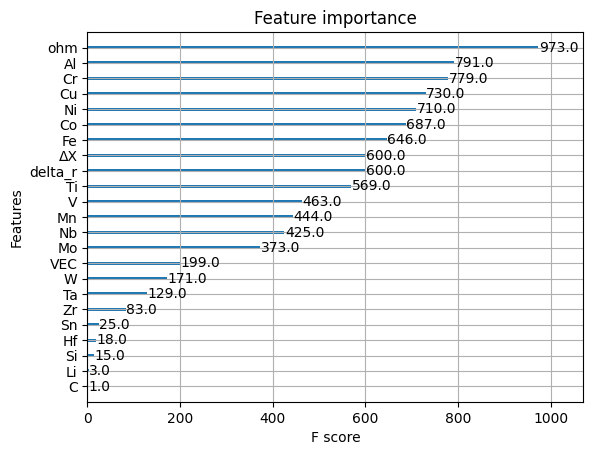

In [7]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming your XGBoost model is stored in 'model'
best_model.get_booster().feature_names = ['Al','C','Co','Cr','Cu','Fe','Hf','Li','Mg','Mn','Mo','Nb','Ni','Si','Sn','Ta','Ti','V','W','Zn','Zr','VEC','delta_r','ohm','ΔX']
xgb.plot_importance(best_model.get_booster())
plt.show()


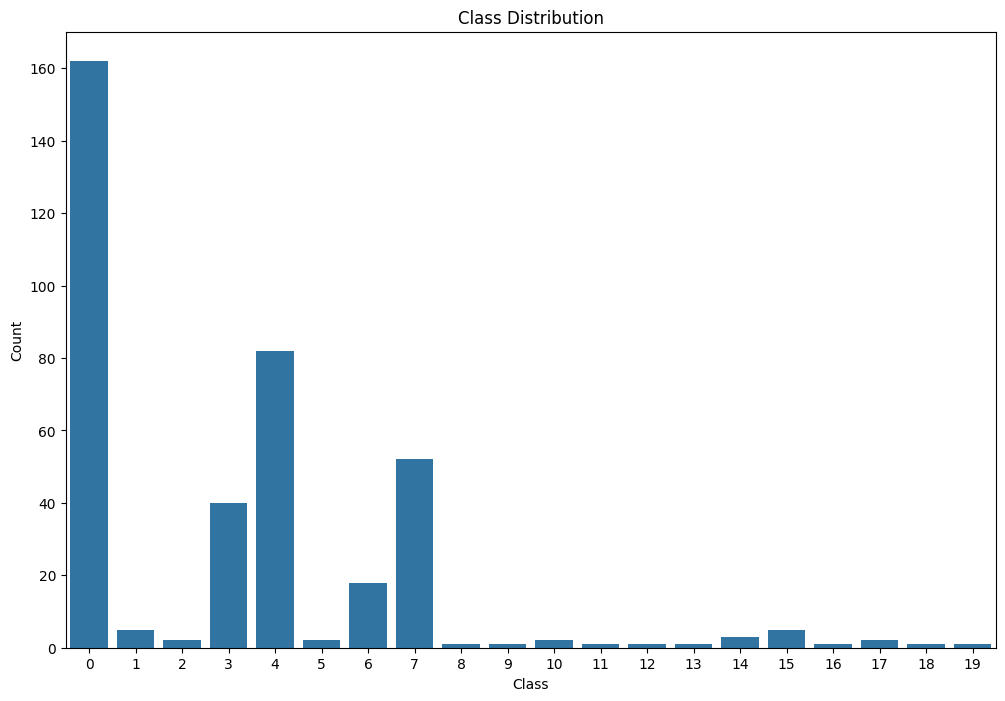

In [8]:
import seaborn as sns

# Assuming 'y_true' contains your true labels
plt.figure(figsize=(12, 8))
sns.countplot(x=Y_train)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


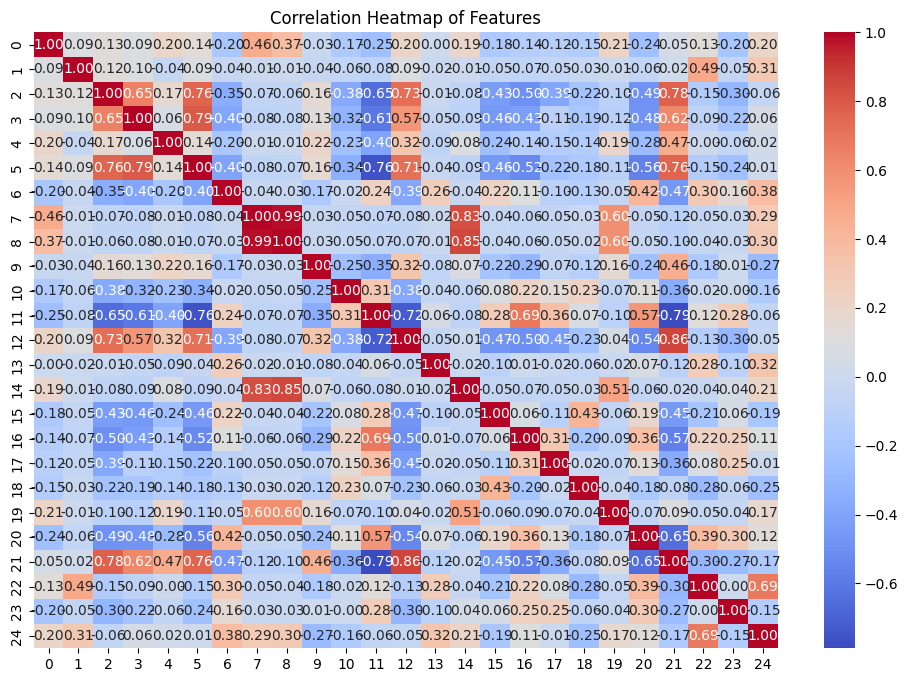

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X' is your feature matrix as a NumPy array
correlation_matrix = np.corrcoef(X, rowvar=False)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


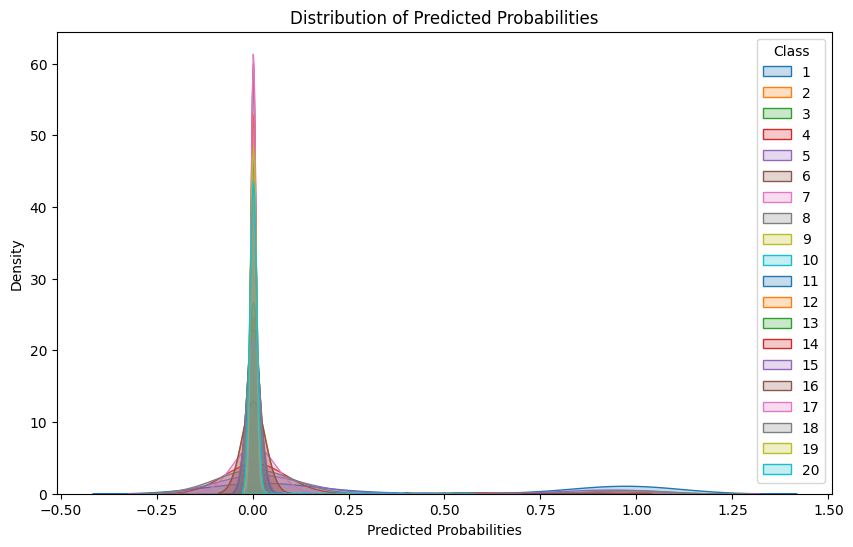

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_scores' contains the predicted probabilities
y_scores = best_model.predict_proba(X_train)

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot the KDE plot
for i in range(20):
    sns.kdeplot(data=y_scores[:, i], label=str(i + 1), fill=True)

plt.xlabel('Predicted Probabilities')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities')

# Add a legend
plt.legend(title='Class')
plt.show()


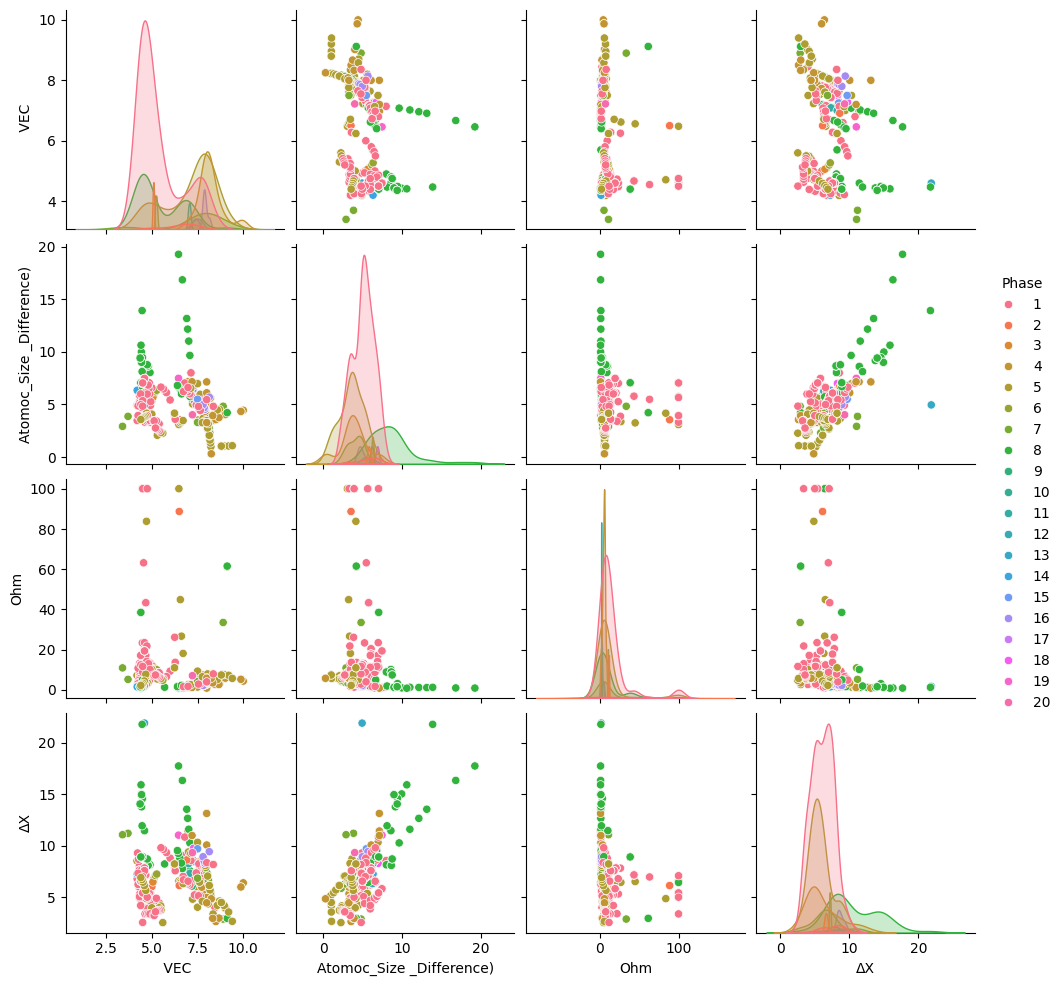

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X' is your feature matrix (DataFrame or numpy array)
df_ = df.iloc[:, -5:]
df_['Phase'] = df['Phase'].astype('category')
color_palette = sns.color_palette('husl', n_colors=20)
sns.pairplot(df_, hue='Phase', palette=color_palette)
plt.savefig('distribution.png')
plt.show()


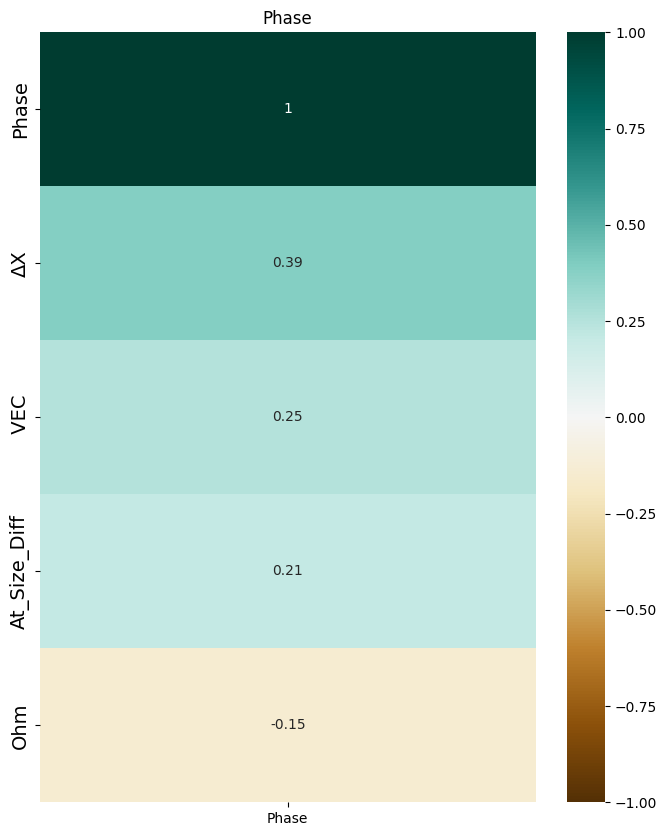

In [12]:
df_.rename(columns={'Atomoc_Size _Difference)': 'At_Size_Diff'}, inplace=True)
plt.figure(figsize=(8,10))
heatmap = sns.heatmap(df_.corr()[['Phase']].sort_values(by='Phase', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Phase')
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 14)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params()
plt.savefig('feature_correlation.png')

In [13]:
import math

train_accuracy = math.floor(train_accuracy * 100) / 100
print(train_accuracy)

val_accuracy = math.floor(val_accuracy * 100) / 100
print(val_accuracy)

test_accuracy = math.floor(test_accuracy * 100) / 100
print(test_accuracy)

0.95
0.94
0.94


In [14]:
from openpyxl import Workbook
from openpyxl.utils import get_column_letter

wb = Workbook()
ws = wb.active

j = 1

ws[str(get_column_letter(j)) + str(1)].value = 'Train_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = train_accuracy

j += 1

ws[str(get_column_letter(j)) + str(1)].value = 'Val_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = val_accuracy

j += 1

ws[str(get_column_letter(j)) + str(1)].value = 'test_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = test_accuracy

j += 1

wb.save('xgb/result.xlsx')
print('Done')

Done


In [15]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(best_model, 'xgb/xgb.joblib')

['xgb/xgb.joblib']